## Importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import opendatasets as od
import numpy as np
import openpyxl

In [2]:
# !pip3 install openpyxl

## Importing dataset

In [2]:
# df = pd.read_excel("./Bean/Drybean.xlsx")
# df_class1 = pd.read_excel("./Bean/Drybean_seker.xlsx")

od.download("https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset")

Skipping, found downloaded files in ".\dry-bean-dataset" (use force=True to force download)


In [3]:
#reading the imported dataset
df = pd.read_excel("./dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

## Prints the summary statistics for each numerical column

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## The head function prints the first n-rows. (default = 5)

In [6]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Prints basic info about the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [8]:
# label_encoder = LabelEncoder()
# df['Class'] = label_encoder.fit_transform(df['Class'])

In [7]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [8]:
#dropping rows to obtain a dataset with only 3 classes
df = df.drop(df[df["Class"].isin(['CALI', 'HOROZ' , 'SIRA', 'DERMASON'])].index)

In [9]:
df.shape

(3871, 17)

In [10]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [11]:
df1["Class"]=(df1["Class"] == "SEKER").astype(int)

In [12]:
corr_matrix = df1.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor2       0.896954
ShapeFactor3       0.839155
Compactness        0.838707
roundness          0.826655
ShapeFactor1       0.736126
Solidity           0.628639
ShapeFactor4       0.559071
Extent             0.223890
MinorAxisLength   -0.648133
Area              -0.655950
ConvexArea        -0.658819
EquivDiameter     -0.727905
MajorAxisLength   -0.767539
Perimeter         -0.787626
Eccentricity      -0.817392
AspectRation      -0.828346
Name: Class, dtype: float64

In [13]:
df2["Class"]=(df2["Class"] == "BARBUNYA").astype(int)

In [14]:
corr_matrix2 = df2.corr()
corr_matrix2["Class"].sort_values(ascending=False)

Class              1.000000
Eccentricity       0.586839
AspectRation       0.580681
Perimeter          0.226561
MajorAxisLength    0.195281
EquivDiameter      0.127981
ConvexArea         0.031047
Area               0.026927
MinorAxisLength    0.024874
ShapeFactor1      -0.176947
ShapeFactor4      -0.184680
Extent            -0.338945
ShapeFactor2      -0.522711
Compactness       -0.588818
ShapeFactor3      -0.591334
Solidity          -0.639290
roundness         -0.795976
Name: Class, dtype: float64

In [15]:
df3["Class"]=(df3["Class"] == "BOMBAY").astype(int)

In [16]:
corr_matrix3 = df3.corr()
corr_matrix3["Class"].sort_values(ascending=False)

Class              1.000000
Area               0.921762
ConvexArea         0.920237
MinorAxisLength    0.913183
EquivDiameter      0.886676
MajorAxisLength    0.851191
Perimeter          0.837135
AspectRation       0.405024
Eccentricity       0.380457
Extent             0.143206
Solidity          -0.031636
roundness         -0.103641
ShapeFactor3      -0.406039
Compactness       -0.408876
ShapeFactor4      -0.561081
ShapeFactor2      -0.585829
ShapeFactor1      -0.830714
Name: Class, dtype: float64

# Creation of sub datasets

### Top 2, 5 and 10

In [17]:
colums_to_add_top_2 = ['ShapeFactor2', 'ShapeFactor3', 'Solidity', 'roundness', 'Area', 'ConvexArea', 'Class']

colums_to_add_top_5 = [
    'ShapeFactor2', 'ShapeFactor3', 'Compactness', 'AspectRation', 'Solidity', 'roundness', 
    'Eccentricity','Area', 'ConvexArea', 'MinorAxisLength','EquivDiameter', 'Class'
    ]

colums_to_add_top_10 = [
'ShapeFactor2', 'ShapeFactor3', 'Compactness', 'roundness', 'Eccentricity', 'AspectRation', 
'MajorAxisLength' , 'Perimeter' , 'EquivDiameter', 'ShapeFactor1', 'Solidity', 'Extent' , 
'ShapeFactor4', 'Area', 'ConvexArea' , 'Class'
]

### Creating Sub Datasets

In [18]:
df_top2 = df.filter(colums_to_add_top_2, axis=1)
df_top5 = df.filter(colums_to_add_top_5, axis=1)
df_top10 = df.filter(colums_to_add_top_10, axis=1)

In [19]:
df_top2.to_excel('Top2.xlsx', index=False)
df_top5.to_excel('Top5.xlsx', index=False)
df_top10.to_excel('Top10.xlsx', index=False)

## Preprocessing Data

### Importing libraries and modules

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

### Transforming Class Feature

In [21]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY'], dtype=object)

In [22]:
#Function to transform Nominal values to Numeric values
def transform_dataset(df):
    df["Class"] = df['Class'].replace(['SEKER', 'BARBUNYA', 'BOMBAY'], [0,1,2])


In [23]:
transform_dataset(df_top2)
transform_dataset(df_top5)
transform_dataset(df_top10)
transform_dataset(df)

In [24]:
df_top2["Class"].unique()

array([0, 1, 2], dtype=int64)

In [25]:
df_top5["Class"].unique()

array([0, 1, 2], dtype=int64)

In [26]:
df_top10["Class"].unique()

array([0, 1, 2], dtype=int64)

### Normalizing Data

In [27]:
# Creating a functing to Scale the dataset

def scale_dataset(dataframe):
  scaler = MinMaxScaler()
  dataframe[dataframe.columns[:-1]] = scaler.fit_transform(dataframe[dataframe.columns[:-1]])
  y = dataframe[dataframe.columns[-1]].values
  return dataframe, y

# scale_dataset(df)

### Splitting into Train and Test Datasets

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics  import f1_score,accuracy_score

In [29]:
# Normalizing data
X, y = scale_dataset(df)

In [30]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.000000,0.000000,0.014217,0.009267,0.186195,0.517291,0.000000,0.000000,0.624114,0.922824,0.917733,0.729821,0.969567,0.833049,0.698093,0.980620,0
1,0.001499,0.020164,0.000000,0.039877,0.078324,0.301490,0.001948,0.002984,0.703850,0.871514,0.738897,0.877810,0.894436,0.967315,0.860551,0.974979,0
2,0.004354,0.010050,0.022851,0.016335,0.199724,0.537484,0.004157,0.008622,0.680561,0.932141,0.892095,0.713074,0.950916,0.800942,0.680152,0.987196,0
3,0.007130,0.025884,0.018637,0.039123,0.139136,0.437247,0.008565,0.014044,0.698731,0.761614,0.781476,0.784522,0.902542,0.854744,0.757321,0.893675,0
4,0.007714,0.007158,0.002458,0.065984,0.038823,0.179374,0.007257,0.015176,0.660612,0.949832,0.985369,0.938662,0.834465,1.000000,0.929398,0.989116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,0.923323,0.953686,0.998671,0.836405,0.824142,0.953628,0.903686,0.947956,0.704434,0.883221,0.538295,0.113294,0.070900,0.008316,0.097129,0.835293,2
3867,0.941234,0.934964,0.976805,0.886402,0.729082,0.921895,0.919240,0.960280,0.850450,0.907939,0.629589,0.180891,0.049392,0.021126,0.157049,0.808956,2
3868,0.972629,0.926686,0.955776,0.951019,0.624778,0.879671,0.948074,0.981632,0.797598,0.930219,0.718640,0.266410,0.021366,0.037189,0.234963,0.846003,2
3869,0.985925,0.952365,0.963342,0.967915,0.615781,0.875590,0.975118,0.990583,0.635464,0.761928,0.663773,0.267382,0.017483,0.036095,0.235862,0.759865,2


In [31]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Classification Models

## Desicion Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

#### Training Model

In [93]:
# Training the model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Evaluating the Model

In [94]:
# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [95]:
# Evaluating the Model

# We use the predict() on the model to predict the output
pred = dtc_model.predict(X_test)

#### Confusion Matrix

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [97]:
cf_matrix = confusion_matrix(y_test, pred)

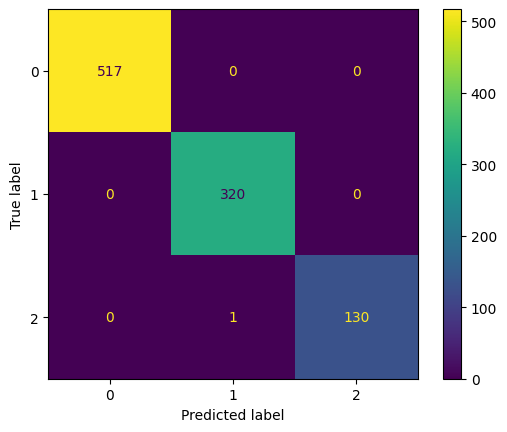

In [100]:
#Plotting confusion Matrix using SKLearn
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc_model.classes_)
vis.plot()
plt.show()

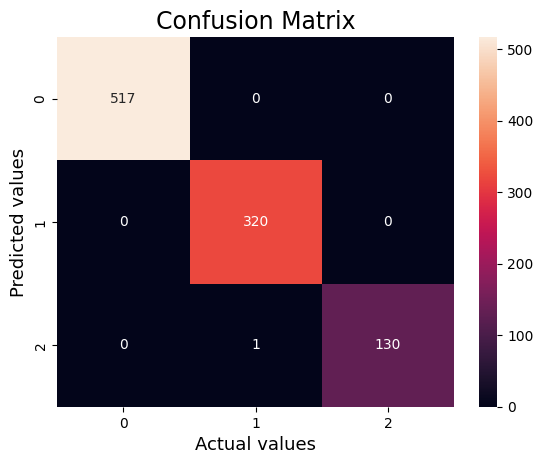

In [101]:
# Plotting a Confusion Matrix in Seaborn
conf_matrix = confusion_matrix(y_test, pred, labels=dtc_model.classes_)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=dtc_model.classes_,
            yticklabels=dtc_model.classes_,
    )
plt.ylabel('Predicted values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Evalutation Of The Model

In [102]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

#### Overall evaluation of the model

In [103]:
print("Accuracy Score : ",accuracy_score(y_test,pred))
print("Precision Score : ",precision_score(y_test, pred, average='micro'))
print("Recall Score : ",recall_score(y_test, pred, average='micro'))
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred))

Accuracy Score :  0.9989669421487604
Precision Score :  0.9989669421487604
Recall Score :  0.9989669421487604
Mean Absolute Error :  0.0010330578512396695


#### Classwise Evaluation of the model

In [104]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# We store all the precisions, recalls, accuracies and FP rate of individual classes in a list
num_classes = len(set(y_test))
precisions = []
recalls = []
accuracies = []
fp_rates = []

# We calculate the precision, recall and accuracies here.
for i in range(num_classes):
    precision_i = precision_score(y_test, pred, labels=[i], average='micro')
    recall_i = recall_score(y_test, pred, labels=[i], average='micro')
    accuracy_i = accuracy_score(y_test, pred)
    precisions.append(precision_i)
    recalls.append(recall_i)
    accuracies.append(accuracy_i)

# We calculate the FP rate of individual classes from the confusion matrix here.
for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    fp_rate_i = FP / (FP + TN)
    fp_rates.append(fp_rate_i)

# We display all the metrics result here
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"FP rate: {fp_rates[i]}")
    print(f"Accuracy: {accuracies[i]}")
    print()


Class 0:
Precision: 1.0
Recall: 1.0
FP rate: 0.0
Accuracy: 0.9989669421487604

Class 1:
Precision: 0.9968847352024922
Recall: 1.0
FP rate: 0.0015432098765432098
Accuracy: 0.9989669421487604

Class 2:
Precision: 1.0
Recall: 0.9923664122137404
FP rate: 0.0
Accuracy: 0.9989669421487604



## Logistic Regression 

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
# Training the model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [105]:
# Evaluating the Model
# We use the predict() on the model to predict the output
pred = lr_model.predict(X_test)

In [89]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, pred)

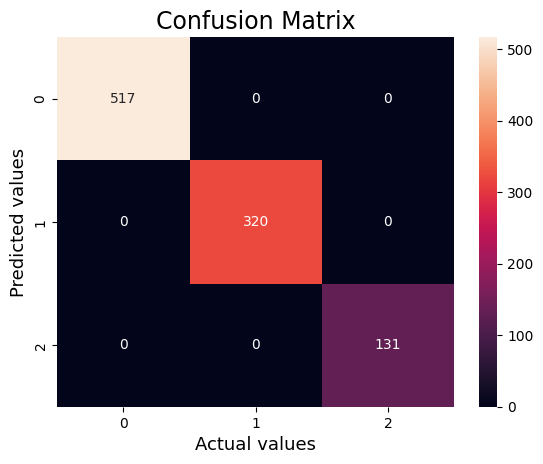

In [90]:
# Plotting a Confusion Matrix in Seaborn
conf_matrix = confusion_matrix(y_test, pred, labels=dtc_model.classes_)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=dtc_model.classes_,
            yticklabels=dtc_model.classes_,
    )
plt.ylabel('Predicted values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Evaluation Of The Model

#### Overall evaluation of the model

In [106]:
print("Accuracy Score : ",accuracy_score(y_test,pred))
print("Precision Score : ",precision_score(y_test, pred, average='micro'))
print("Recall Score : ",recall_score(y_test, pred, average='micro'))
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred))

Accuracy Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
Mean Absolute Error :  0.0


#### Classwise Evaluatuion of the model

In [91]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# We store all the precisions, recalls, accuracies and FP rate of individual classes in a list
num_classes = len(set(y_test))
precisions = []
recalls = []
accuracies = []
fp_rates = []

# We calculate the precision, recall and accuracies here.
for i in range(num_classes):
    precision_i = precision_score(y_test, pred, labels=[i], average='micro')
    recall_i = recall_score(y_test, pred, labels=[i], average='micro')
    accuracy_i = accuracy_score(y_test, pred)
    precisions.append(precision_i)
    recalls.append(recall_i)
    accuracies.append(accuracy_i)

# We calculate the FP rate of individual classes from the confusion matrix here.
for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    fp_rate_i = FP / (FP + TN)
    fp_rates.append(fp_rate_i)

# We display all the metrics result here
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"FP rate: {fp_rates[i]}")
    print(f"Accuracy: {accuracies[i]}")
    print()

Class 0:
Precision: 1.0
Recall: 1.0
FP rate: 0.0
Accuracy: 1.0

Class 1:
Precision: 1.0
Recall: 1.0
FP rate: 0.0
Accuracy: 1.0

Class 2:
Precision: 1.0
Recall: 1.0
FP rate: 0.0
Accuracy: 1.0



### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier